### Import the relevant lib

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [50]:
observations = 1000
# size = number of observation x number of variables
xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(-10, 10, size=(observations, 1))

inputs = np.column_stack((xs, zs))
print(inputs.shape)

(1000, 2)


### Create the targets we will aim at

In [51]:
# assume targets = f(x,z) = 2*x - 3*z + 5 + noise
noise = np.random.uniform(-1, 1, (observations, 1))
targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)


(1000, 1)


### Plot the training data

(1000,)
(1000,)
(1000, 1)


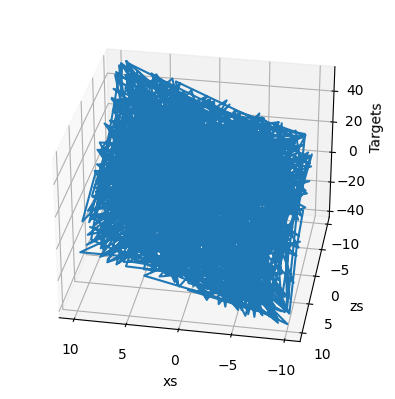

In [56]:
targets = targets.reshape(observations, )
xs = xs.reshape(observations, )
za = zs.reshape(observations,)
print(targets.shape)
print(xs.shape)
print(zs.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations, 1)


Initialize variables

In [57]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size = (2, 1))
biases = np.random.uniform(-init_range, init_range, size = 1)
print(weights)
print(biases)

[[-0.07762549]
 [-0.06076669]]
[0.05172784]


### Set a learning rate

In [59]:
learning_rate = 0.02

### Train the model

In [62]:
# Game plan for each iteration
# 1. Calculate outputs
# 2. Compare outputs to targets through loss
# 3. Print loss
# 4. Adjust weights and biases
# 5. Repeat 1-4

for i in range(100):
  outputs = np.dot(inputs, weights) + biases
  deltas = outputs - targets
  loss = np.sum(deltas ** 2) / 2 / observations
  print(loss)
  deltas_scaled = deltas / observations
  weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
  biases = biases - learning_rate * np.sum(deltas_scaled)

0.3727580449455364
0.3641786059642819
0.35593868991243427
0.34802486050122744
0.34042421316992055
0.33312435404317464
0.32611337972117926
0.31937985786956
0.312912808577427
0.30670168645315166
0.30073636342869436
0.2950071122444293
0.28950459058754224
0.28421982585813615
0.27914420053820316
0.2742694381396059
0.26958758970815105
0.2650910208617556
0.2607723993415592
0.25662468305569625
0.2526411085962158
0.24881518021044102
0.24514065920877134
0.24161155379166088
0.23822210927918736
0.23496679872727394
0.2318403139152636
0.2288375566901547
0.22595363065337778
0.22318383317656157
0.22052364773326463
0.21796873653417495
0.21551493345376116
0.2131582372368461
0.21089480497402333
0.20872094583527875
0.20663311505159548
0.20462790813473256
0.20270205532575064
0.20085241626323186
0.19907597486249762
0.1973698343974789
0.19573121277721525
0.19415743800928306
0.19264594384275147
0.19119426558356792
0.1898000360755433
0.18846098184038432
0.1871749193704855
0.18593975156842385
0.1847534643273616

### Print weights and biases and see if we have worked correctly

In [63]:
print(weights, biases)

[[ 1.99869123]
 [-2.99790174]] [4.94097917]


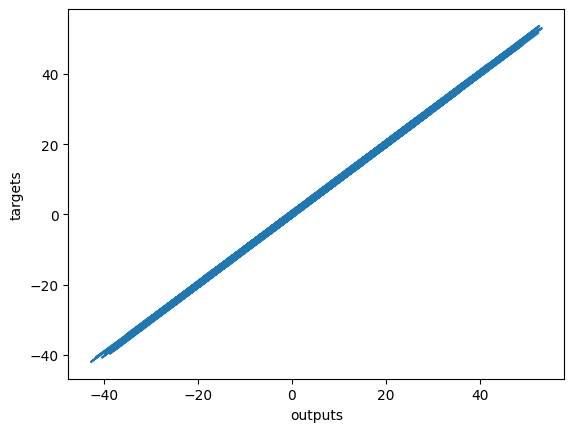

In [64]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show() 

### Plot last outputs vs targets